buffer=106.0 min_radius=256.0 max_radius=307.2 3 * self.tissue_config.guidelines_std=150 
-106.0 1130.0
[(490.20540784389016, 691.9269996116847), (686.4144417056474, 292.0779824462725), (681.6210111646628, 477.58040694238304), (166.8844092870549, 538.2352388004422), (781.5783789295384, 534.2331451983819)]
[(172, 122), (72, 170), (118, 169), (134, 41), (133, 194)]
[(80.4256808012733, 191.3295523549139), (167.8098806422145, 218.81182745600435), (113.12596437649879, 81.13948989917913), (148.23000508179447, 48.73704233886747), (202.80375164971574, 69.08019837433636), (108.75038224544255, -9.727520787762728)]
[(47, 20), (54, 41), (20, 28), (12, 36), (17, 50), (0, 27)]


100%|██████████| 500/500 [01:02<00:00,  8.06it/s]
INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.HTMLWriter'>


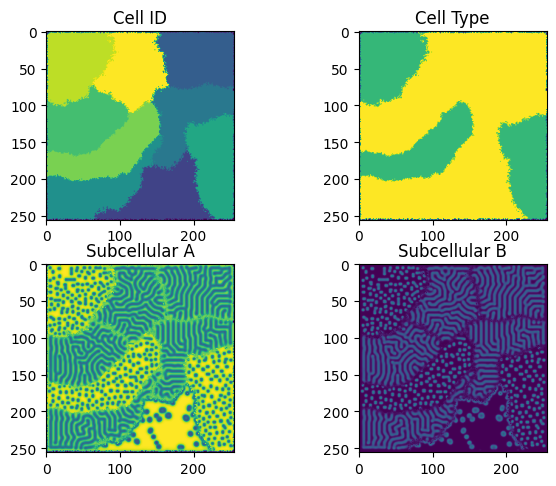

In [9]:
import torch
import matplotlib.pyplot as plt
from multiomicscellsim import Simulator
from multiomicscellsim.config import SimulatorConfig, MicroscopySpaceConfig, TissueConfig

from multiomicscellsim.torch_cpm.config import TorchCPMConfig, TorchCPMCellType
from multiomicscellsim.patterns.config import RDPatternLibrary
from multiomicscellsim.torch_cpm.simulation import TorchCPM

from IPython.display import HTML

size = 256
n_cell_types = 2

# TODOs:
# - Add a distirbution across cell_types across a guideline

# Define some cell types

cell_types = [
    TorchCPMCellType(id=1,
                     name="A",
                     background_adhesion=10.0,
                     cells_adhesion=TorchCPMCellType.build_constant_adhesion_vector(x=10.0, this_id=1, n_types=n_cell_types),
                     preferred_volume=int(0.2*size**2),
                     preferred_local_perimeter=4.0,
                     # RDPatternConfig contains f, k, D_a, D_b params)
                     subcellular_pattern=RDPatternLibrary.get_pattern_by_name('Worms'),
    ),
    TorchCPMCellType(id=2,
                     name="B",
                     background_adhesion=10.0,
                     cells_adhesion=TorchCPMCellType.build_constant_adhesion_vector(x=10.0, this_id=2, n_types=n_cell_types),
                     preferred_volume=int(0.2*size**2),
                     preferred_local_perimeter=4.0,
                     subcellular_pattern=RDPatternLibrary.get_pattern_by_name('Fingerprints'),
    )
]

# Define the global simulation parameters

sim_config = SimulatorConfig(
    tissue_config = TissueConfig(
        n_curves=2,
        curve_types="circles",
        cell_number_mean = 5,
        cell_number_std = 3,
        cell_type_probabilities = [[.3, .7], [.7, .3]],
        initial_cell_size=7
    ),
    cpm_config = TorchCPMConfig(
        size=size,
        frontier_probability=0.8,
        temperature=1.0,
        cell_types=cell_types,
        lambda_volume=10.0,
        lambda_perimeter=10.0,
        max_cpm_steps=500,
        run_rd_every=2,
        rd_warmup_steps=10000,
        rd_steps=100,   
    ),
    save_tissue_every=100,
)

sim = Simulator(config=sim_config)
tissues = sim.tissue_generator.sample()
HTML(sim.plot_tissues(tissues))